In [68]:
import pandas as pd


In [69]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [70]:
df.shape

(10000, 6)

In [71]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Columns Details:

1.   Hours Studied
2.   Previous Scores
1.   Extracurricular Activities
2.  Sleep Hours
1.   Sample Question Papers Practiced
2.   Performance Index






In [72]:
# Checking for Null Value.
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

There aren't any Null value(No missing values in dataset.)

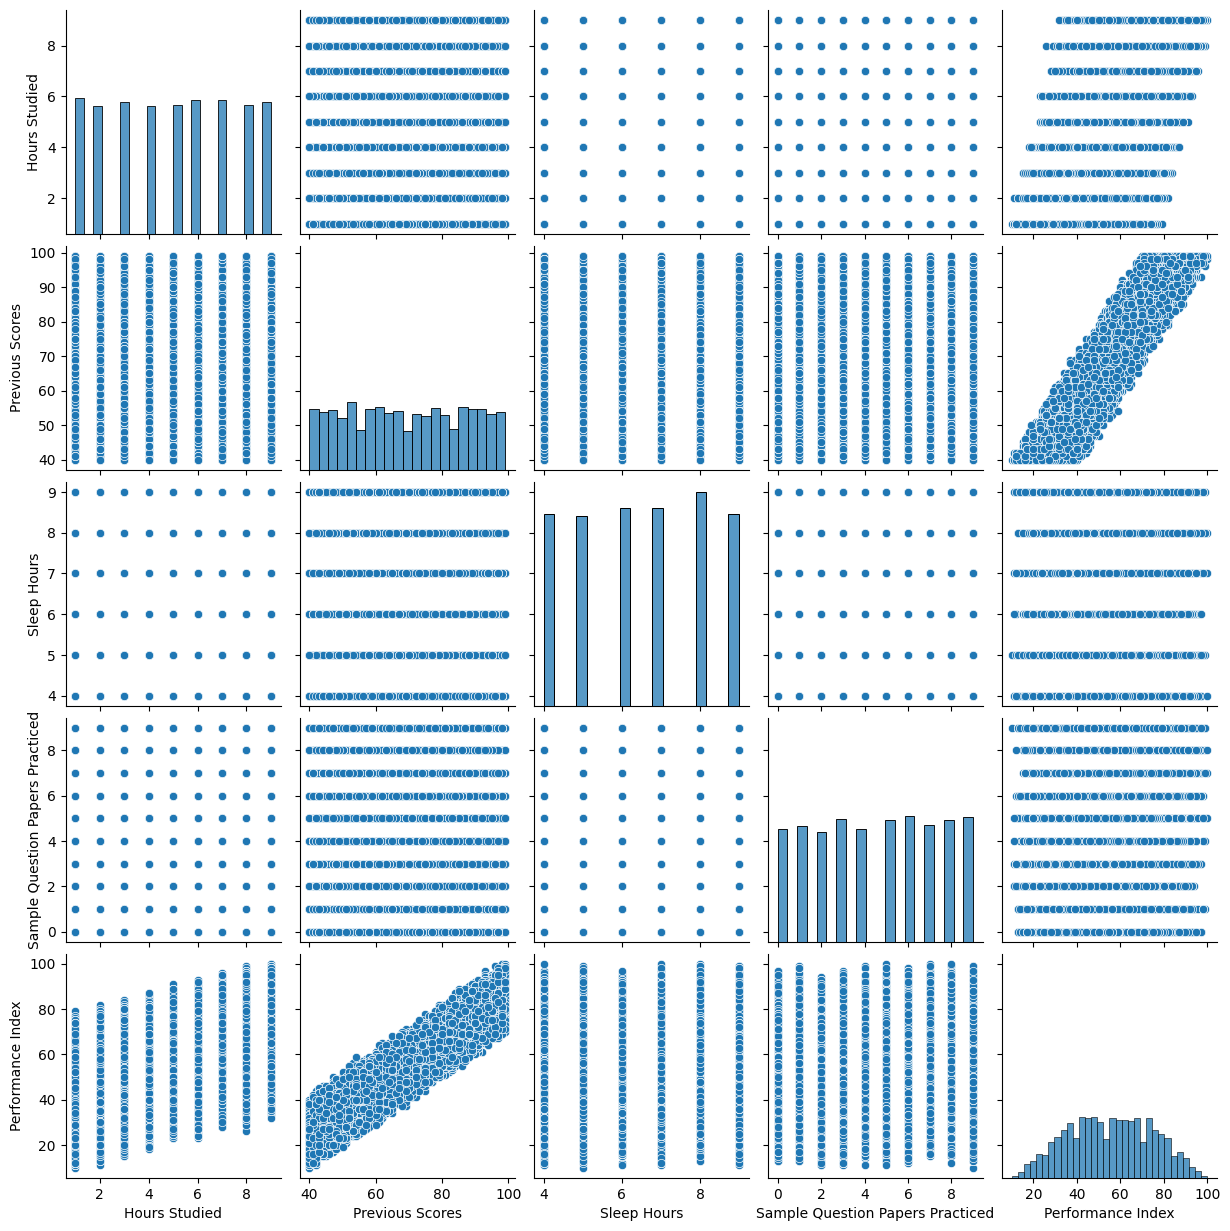

In [74]:
sns.pairplot(df)
plt.show()

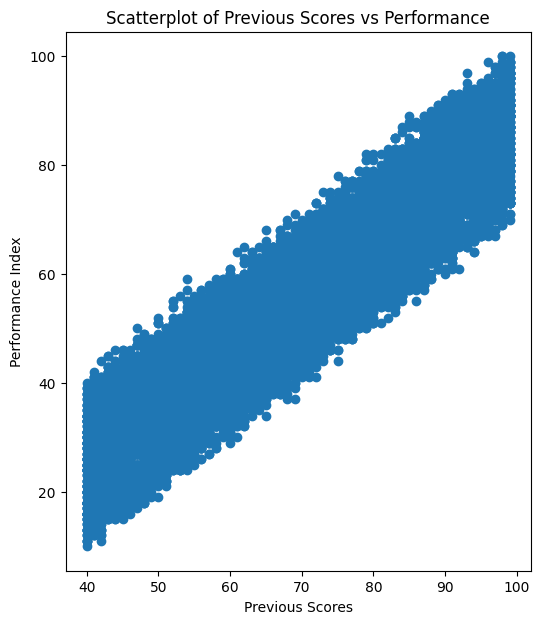

In [75]:
# Plotting a scatterplot
plt.figure(figsize=(6,7))
plt.scatter(df['Previous Scores'],df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Scatterplot of Previous Scores vs Performance')
plt.show()

In [76]:
# Dividing Independent and Dependent variables.
X = df[['Previous Scores']]
y = df['Performance Index']

In [77]:
X,y

(      Previous Scores
 0                  99
 1                  82
 2                  51
 3                  52
 4                  75
 ...               ...
 9995               49
 9996               64
 9997               83
 9998               97
 9999               74
 
 [10000 rows x 1 columns],
 0       91.0
 1       65.0
 2       45.0
 3       36.0
 4       66.0
         ... 
 9995    23.0
 9996    58.0
 9997    74.0
 9998    95.0
 9999    64.0
 Name: Performance Index, Length: 10000, dtype: float64)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [80]:
# Shape of Dependent and Independent Variables
X.shape,y.shape

((10000, 1), (10000,))

In [81]:
# Knowing the sep of the Test and Train data.
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7000, 1), (7000,), (3000, 1), (3000,))

In [82]:
# X_train = X_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)
# y_train = y_train.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

In [83]:
y_train

,Performance Index
9069,82.0
2603,79.0
7738,50.0
1579,81.0
5058,52.0
...,...
5734,48.0
5191,51.0
5390,44.0
860,20.0


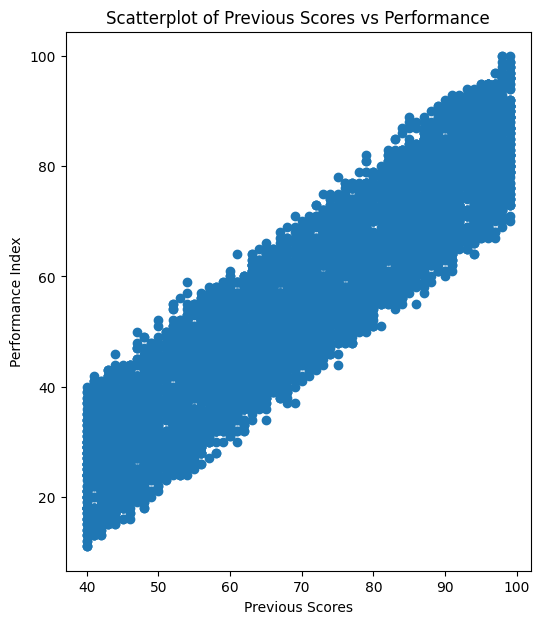

In [84]:
# Ploting X_train and y_train on Scatterplot
plt.figure(figsize=(6,7))
plt.scatter(X_train,y_train)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Scatterplot of Previous Scores vs Performance')
plt.show()

In [85]:
# Train the model Simple Linear Regression.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [86]:
model

LinearRegression()

In [87]:
model.fit(X_train,y_train)

LinearRegression()

In [88]:
print("The slope is: ",model.coef_)
print("The intercept of Line is :",model.intercept_)

The slope is:  [1.01220922]
The intercept of Line is : -15.052650308263033


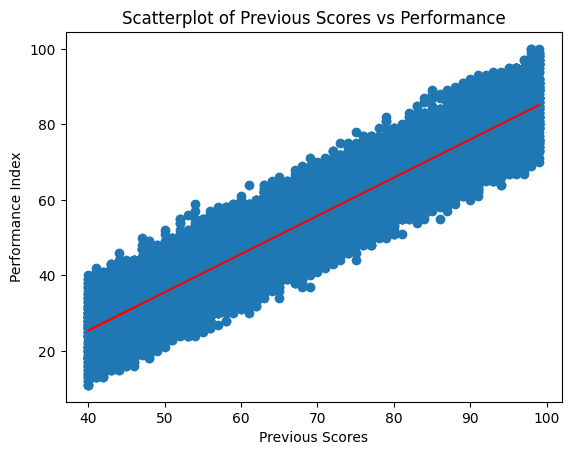

In [89]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color='red')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Scatterplot of Previous Scores vs Performance')
plt.show()

In [90]:
y_pred_test = model.predict(X_test)

In [91]:
y_pred_test,y_test

(array([54.78978593, 31.50897385, 41.63106606, ..., 33.53339229,
        71.99734268, 28.47234619]),
 6252    51.0
 4684    20.0
 1731    46.0
 4742    28.0
 4521    41.0
         ... 
 8014    32.0
 1074    40.0
 3063    33.0
 6487    69.0
 4705    29.0
 Name: Performance Index, Length: 3000, dtype: float64)

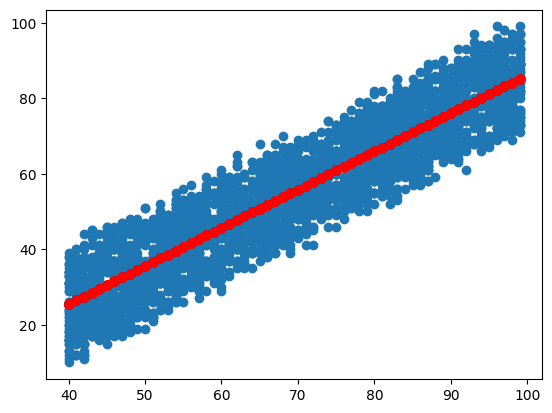

In [92]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,model.predict(X_test), color='red')
plt.show()

In [93]:
import numpy as np



*  Performance Metrics



*   MSE,RMSE,MAE
*   R2 Score,Adjusted R2 Score





In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [95]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  58.593853217062524
Root Mean Squared Error:  7.654662188304754
Mean Absolute Error:  6.526949199984063


In [96]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)
print("R2 Score: ",score * 100,'%')

0.8416637918193197
R2 Score:  84.16637918193197 %


In [97]:
X_test.shape[1]

1

In [98]:
# Display Adjusted R2 Score
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score: ",adjusted_r2 * 100,'%')

Adjusted R2 Score:  84.16109778739626 %


In [99]:
model

LinearRegression()

In [100]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [101]:
Previous_Scores = [[82]]

In [102]:
print(model.predict(Previous_Scores))

[67.9485058]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Assumption of Linear Regression

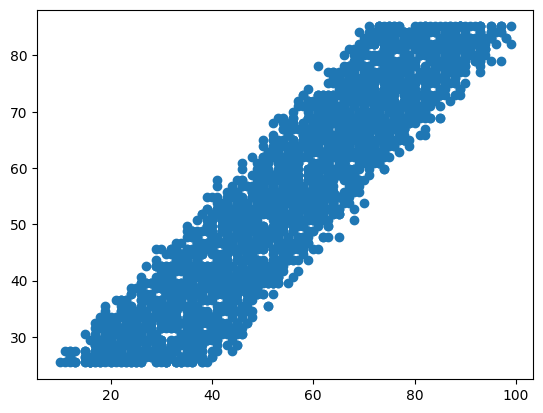

In [103]:
# Plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)
plt.show()

In [104]:
# Residuals
residuals = y_test  - y_pred_test
print(residuals)

6252    -3.789786
4684   -11.508974
1731     4.368934
4742     0.539863
4521     2.405562
          ...    
8014     4.539863
1074    -5.679903
3063    -0.533392
6487    -2.997343
4705     0.527654
Name: Performance Index, Length: 3000, dtype: float64


In [105]:
import seaborn as sns

/tmp/ipython-input-3137684228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)


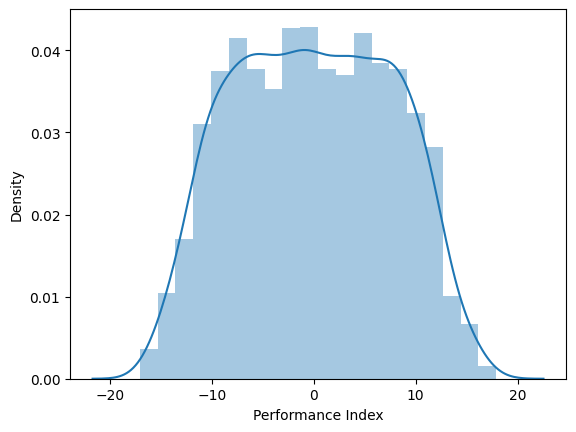

In [106]:
sns.distplot(residuals,kde = True)
plt.show()

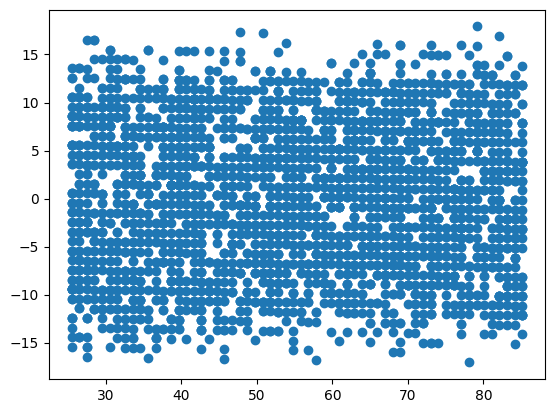

In [107]:
# Scatter plot with respect to prediction and residuals
plt.scatter(y_pred_test,residuals)
plt.show()